In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

#Problem 1

In [7]:
df = pd.read_csv('train.csv')
print(df.shape)

(1460, 81)


#Problem 2: Investigating the dataset itself

The training set has 1460 datapoints. Each has 81 attribute measured. The objective variable is SalePrice, the selling price of each house.

Some description: 

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- and [more](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv)

#Problem 3: Checking the data

For this exercise, 'SalePrice', which is the actual property sale value is our target variable.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
df.loc[:,'SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [13]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#Problem 4:  Dealing with missing values

AxesSubplot(0.125,0.125;0.775x0.755)


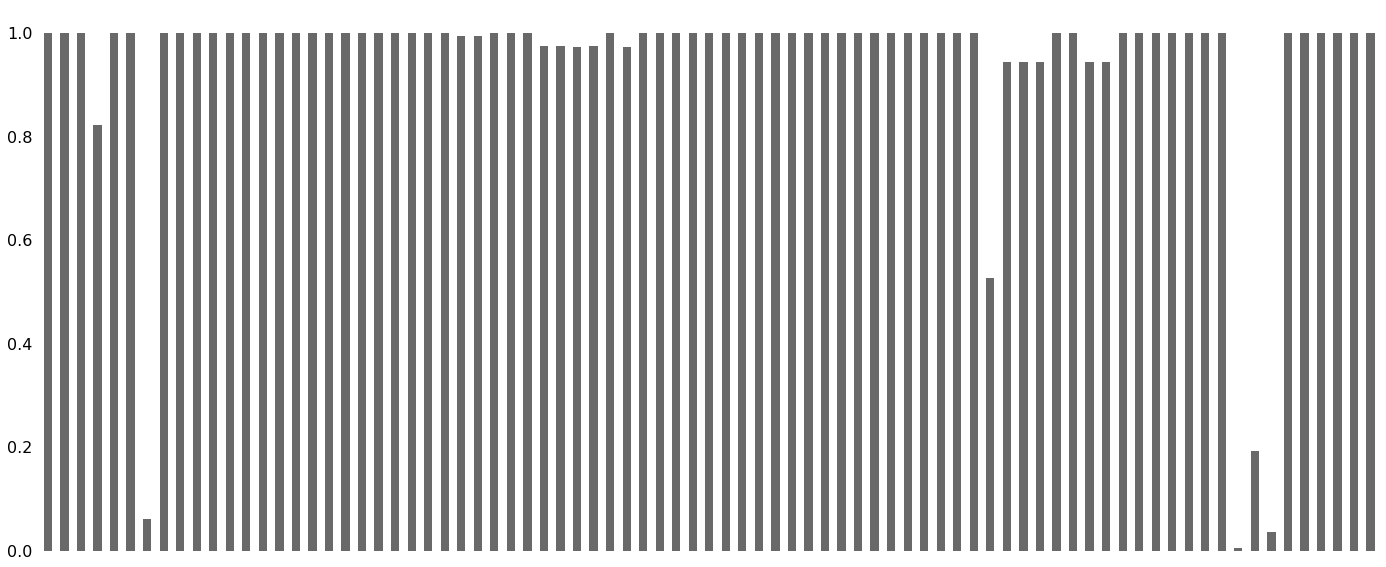

In [20]:
ms = msno.bar(df)
print(ms)

In [59]:
missing = df.isnull().sum()
pcg = missing / df.isnull().count()
missing_pcg = pd.concat([missing, pcg], axis=1, keys=['total', 'missing_ratio']).sort_values('missing_ratio',ascending=False)
print(missing_pcg)

             total  missing_ratio
PoolQC        1453       0.995205
MiscFeature   1406       0.963014
Alley         1369       0.937671
Fence         1179       0.807534
FireplaceQu    690       0.472603
...            ...            ...
ExterQual        0       0.000000
Exterior2nd      0       0.000000
Exterior1st      0       0.000000
RoofMatl         0       0.000000
SalePrice        0       0.000000

[81 rows x 2 columns]


In [68]:
# to_delete = list(missing_pcg.head(5).index)
df = df.loc[:,df.isnull().sum() < 5]

(1460, 63)

#Problem 5

- Skewness: measure the asymetry of the probability distribution. It measure of how much [the probability distribution of a random variable deviates from the normal distribution](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/). 
  - A positive skew will have its left tail longer when the distribution is drawn, and vice versa. skewness level of 0 will be the normal distribution
- Kurtosis: Kurtosis is a statistical measure used to describe the degree to which scores cluster in the tails or the peak of a frequency distribution.

#Problem 6

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


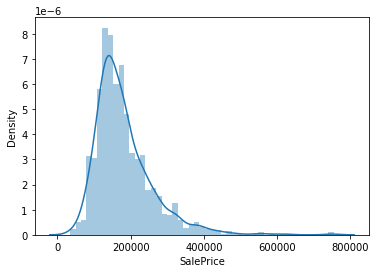

In [77]:
plt = sns.distplot(df['SalePrice'])


In [86]:
print('Skew:',df['SalePrice'].skew())
print('Kurt:',df['SalePrice'].kurt())

Skew: 1.8828757597682129
Kurt: 6.536281860064529


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


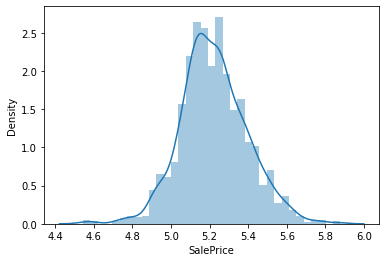

In [85]:
obj = df['SalePrice']
obj = obj.apply(np.log10)
sns.distplot(obj)

In [87]:
print('Skew:',obj.skew())
print('Kurt:',obj.kurt())

Skew: 0.12133506220521144
Kurt: 0.8095319958036291


After logarithmic transformation, the distribution of SalePrice now achieve normality, aka normal distribution.

Before,the distribution plot is skew the the left, hence its skewness is positive and high. After the transformation, the skewness is closer to 0 ( approximately 0.1213 )

#Problem 7

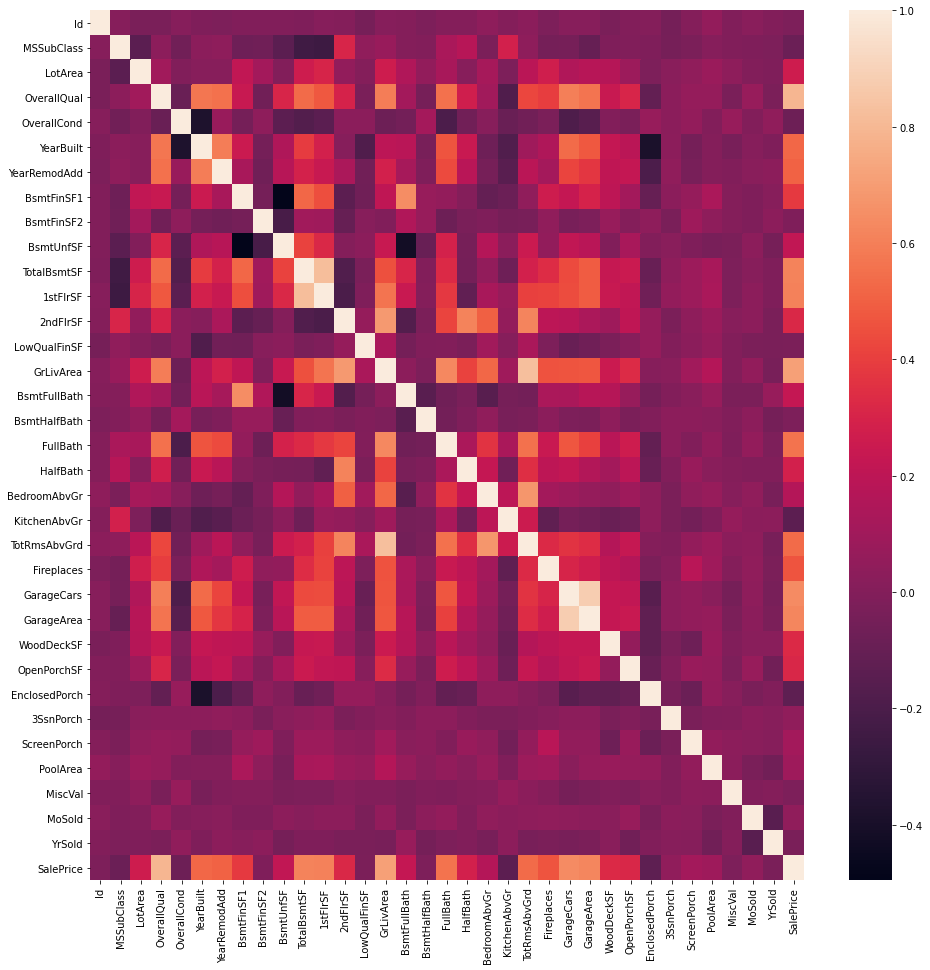

In [99]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(corr_matrix, ax=ax)

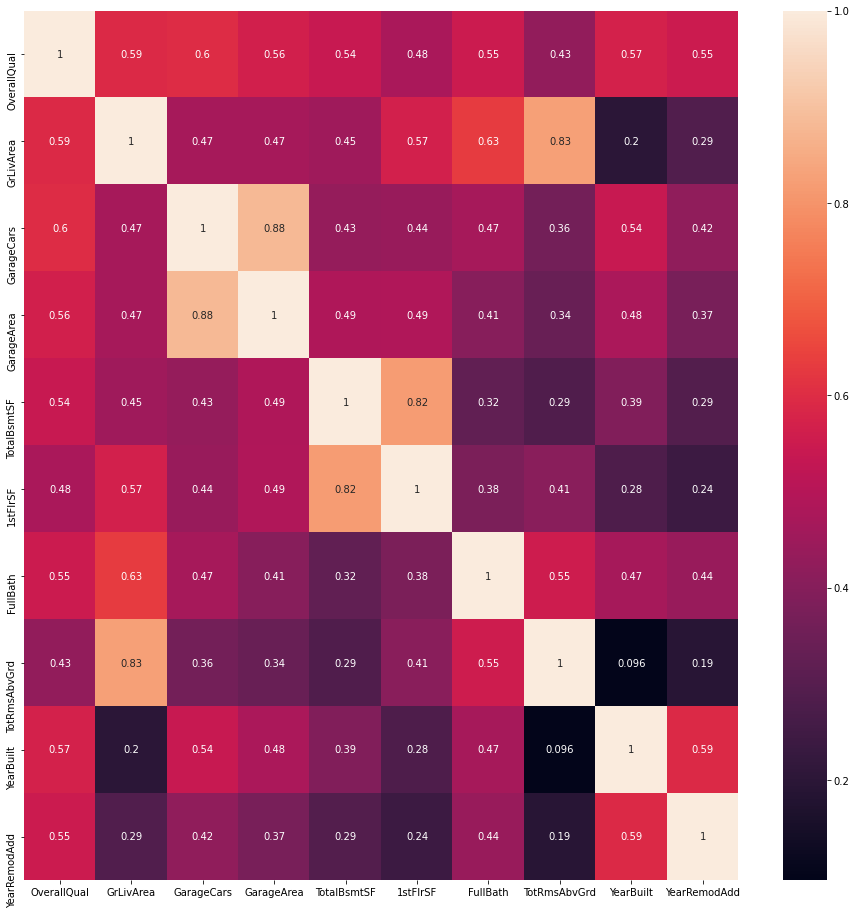

In [117]:
feature_name = list(corr_matrix['SalePrice'].nlargest(11).iloc[1:].index)

new_df = df[feature_name]
corr_matrix2 = new_df.corr()
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(corr_matrix2, annot=True)

**Summarize whether the 10 selected features represent something by referring to the description in Kaggle's DataDescription.**
- OverallQual: Overall material and finish quality ( HIGH )
- GrLivArea: Above grade (ground) living area square feet
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- TotalBsmtSF: Total square feet of basement area ( HIGH )
- 1stFlrSF: First Floor square feet
- FullBath: Full bathrooms above grade
- TotRmsAbvGrd: Total rooms above grade
- YearBuilt: When it was built
- YearRemodAdd: Remodel date

**Find 3 combinations of the 10 selected features that have high correlation coefficients with each other.**
- GarageCars and GarageArea
- 1stFlrSF and TotalBsmtSF
- TotRmsAbvGrd and GrLivArea

These 3 combinations are too highly correlated we have to take in consideration of multicolinearity. This can adversely affect our analysis